# Laboratorio PDS
# Juan Camilo chaparro Castellanos
## cc 1039466438
## Laboratorio #7
### 1) Transformada Rapida de Fourier de Señales Discretas

In [49]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import IPython
import math

def dftmatrix(N, Nfft):
    #construct DFT matrix
    k= np.arange(Nfft)
    if N is None: N = Nfft
    n = np.arange(N)
    U = np.matrix(np.exp(1j* 2*np.pi/Nfft *k*n[:,None]))
    return U/np.sqrt(Nfft)


In [50]:
#X=U.H*x # donde U.H significa el complejo conjugado de la matriz U

#### 2.) Generacion de señales y T. de Fourier

In [51]:
C=8
f1=(1+C)*16
f2=3*C+20
f3=(3+C)*50-90
f4=5*C+80

#Señales
fs= 4000
t = np.arange(0, 0.9, 1/fs) #tiempo para las 4 señales
x1=np.sin(2*np.pi*f1*t)
x2=np.sin(2*np.pi*f2*t)
x3=np.sin(2*np.pi*f3*t)
x4=np.sin(2*np.pi*f4*t)

In [52]:
print(f1)
print(f2)
print(f3)
print(f4)

144
44
460
120


#### para realizar una mejor visualizacion de de las señales se genera un zoom en la anterior grafica

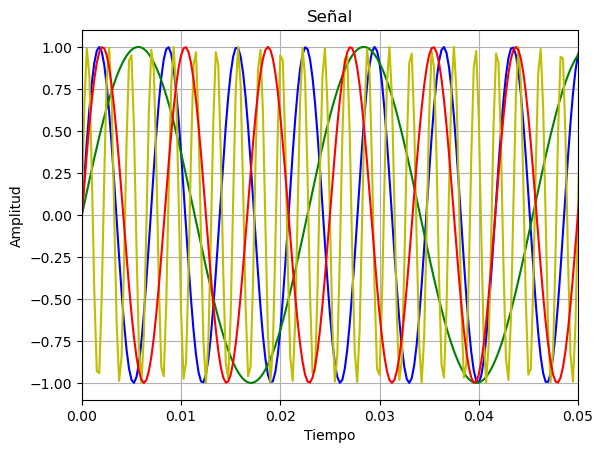

In [53]:
plt.plot(t, x1,'b')
plt.plot(t, x2,'g')
plt.plot(t, x3,'y')
plt.plot(t, x4,'r')
plt.xlim(0,0.05)
plt.title('Señal')
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.grid()
plt.show()


#### 2.2, 2.3 y 2.4) transformada de Fourier usando U y NFFT

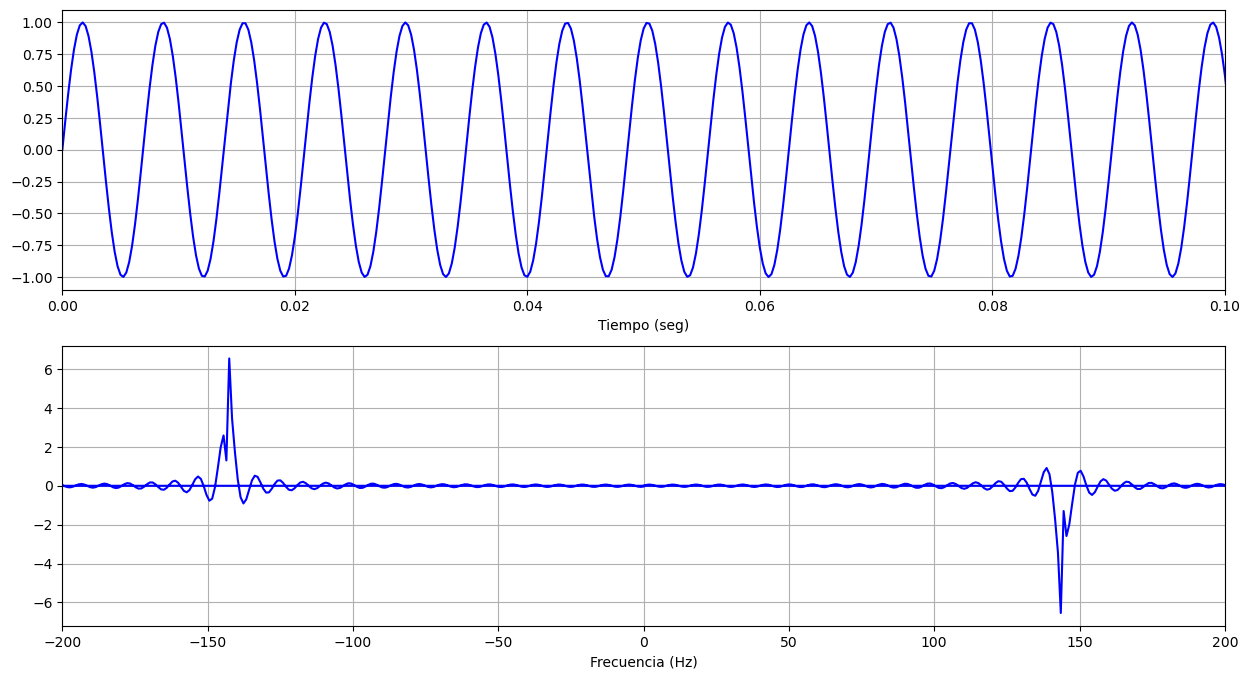

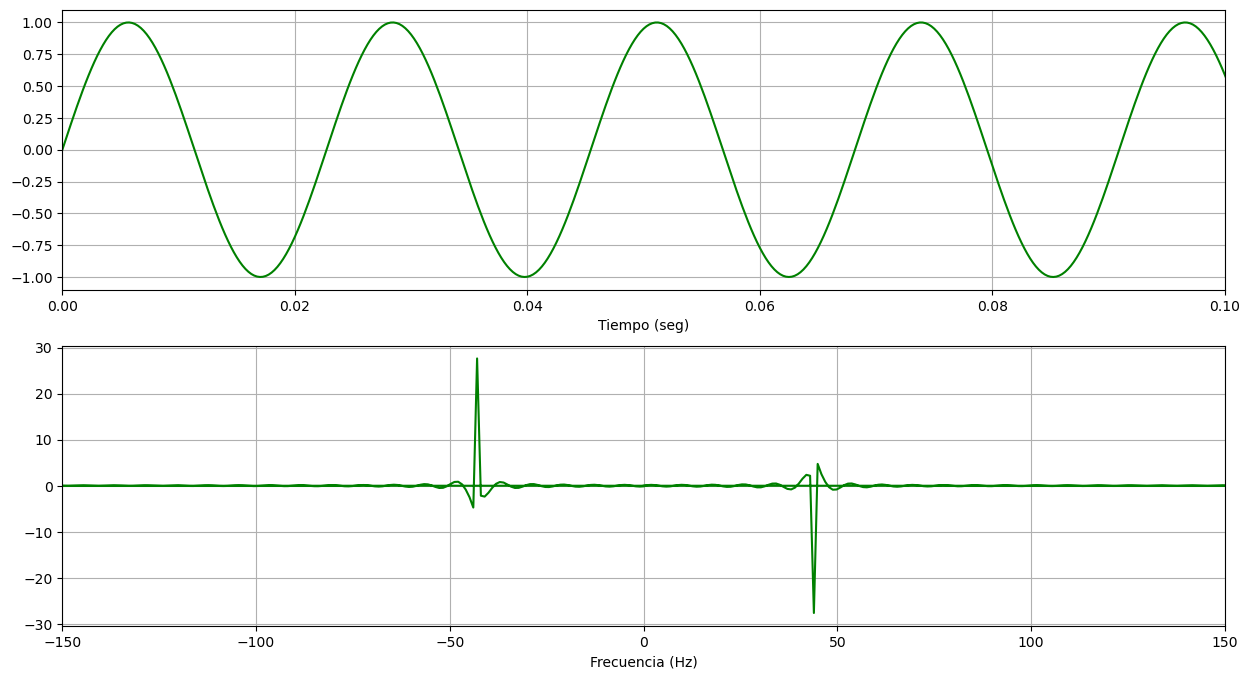

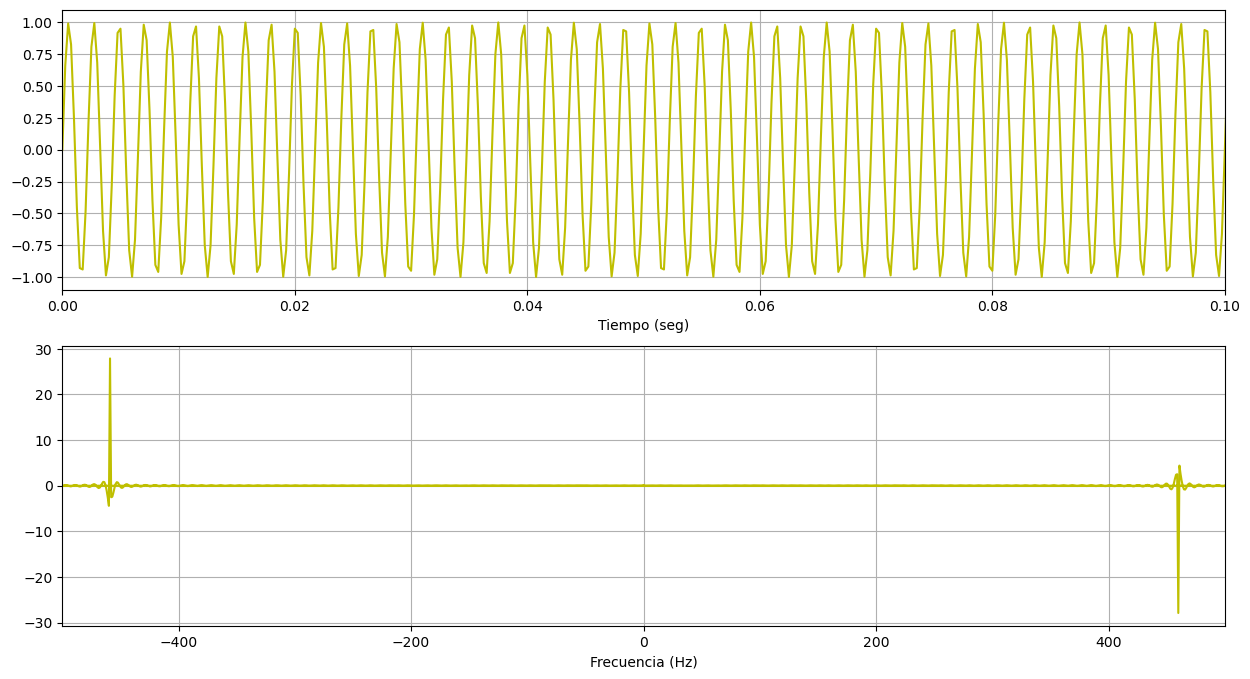

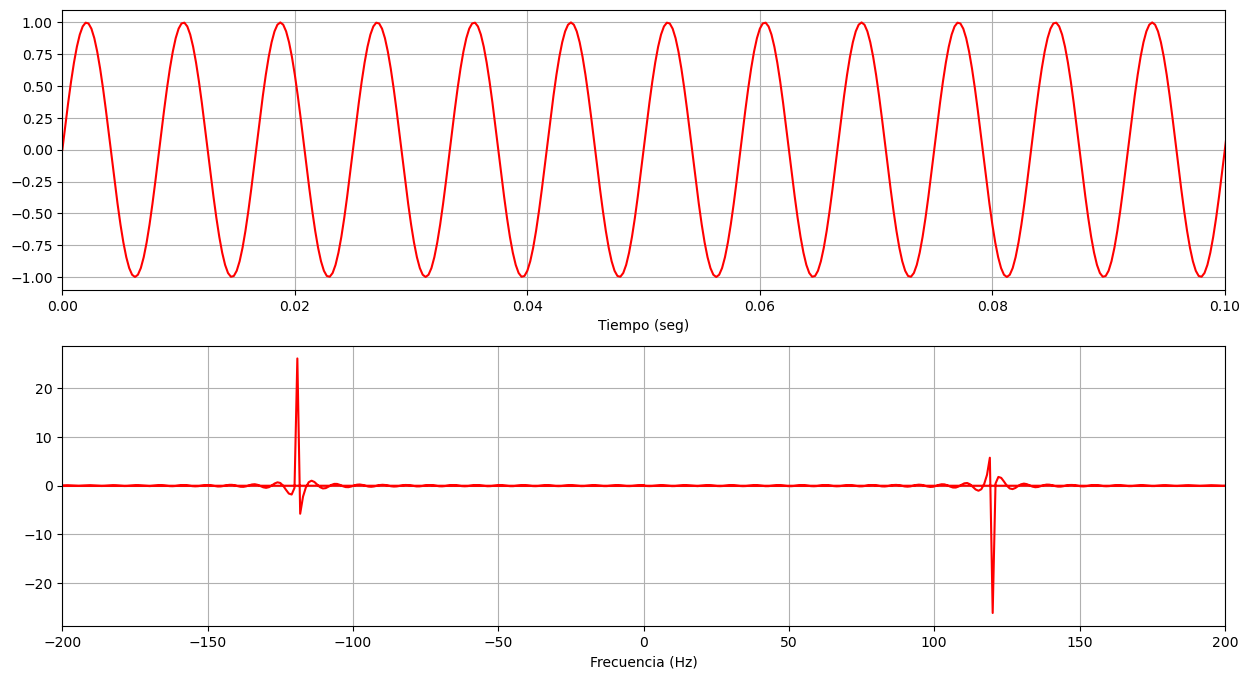

In [54]:
#Señales
fs= 4000
t = np.arange(0, 0.9, 1/fs) #tiempo para las 4 señales
#nfft de 4096 puntos
nfft=4096
x1.shape=(len(x1),1) # Convierto en vector columna para poder multiplicar con la matriz
x2.shape=(len(x2),1) 
x3.shape=(len(x3),1)
x4.shape=(len(x4),1)

U1=dftmatrix(len(x1), nfft) #matriz de transformacion
U2=dftmatrix(len(x2), nfft)
U3=dftmatrix(len(x3), nfft)
U4=dftmatrix(len(x4), nfft)

Xf1=U1.H*x1[:] # calculo la fft
Xf2=U2.H*x2[:]
Xf3=U3.H*x3[:]
Xf4=U4.H*x4[:]


freq=np.hstack((np.arange(0, nfft/2-1), np.arange(-nfft/2, 1)))*fs/nfft # vector de frecuencias
plt.figure(figsize=(15,8))
plt.subplot(211)
plt.plot(t, x1,'b')
plt.xlim(0,0.1)
plt.xlabel('Tiempo (seg)')
plt.grid()
plt.subplot(212)
plt.plot(freq, np.imag(Xf1),'b')
plt.xlabel('Frecuencia (Hz)')
plt.xlim(-200,200)
plt.grid()




plt.figure(figsize=(15,8))
plt.subplot(211)
plt.plot(t, x2,'g')
plt.xlim(0,0.1)
plt.xlabel('Tiempo (seg)')
plt.grid()
plt.subplot(212)
plt.plot(freq, np.imag(Xf2),'g')
plt.xlabel('Frecuencia (Hz)')
plt.xlim(-150,150)
plt.grid()




plt.figure(figsize=(15,8))
plt.subplot(211)
plt.plot(t, x3,'y')
plt.xlim(0,0.1)
plt.xlabel('Tiempo (seg)')
plt.grid()
plt.subplot(212)
plt.plot(freq, np.imag(Xf3),'y')
plt.xlabel('Frecuencia (Hz)')
plt.xlim(-500,500)
plt.grid()



plt.figure(figsize=(15,8))
plt.subplot(211)
plt.plot(t, x4,'r')
plt.xlim(0,0.1)
plt.xlabel('Tiempo (seg)')
plt.grid()
plt.subplot(212)
plt.plot(freq, np.imag(Xf4),'r')
plt.xlabel('Frecuencia (Hz)')
plt.xlim(-200,200)
plt.grid()

#### como se muestra anteriormente se realiza un zoom en las señales para mostrar un seg de cada señal y respuesto a su espectro una ventana determinada de frecuencias

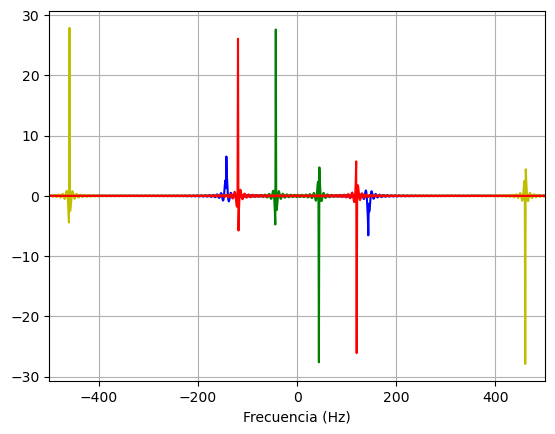

In [55]:
plt.plot(freq, np.imag(Xf1),'b')
plt.plot(freq, np.imag(Xf2),'g')
plt.plot(freq, np.imag(Xf3),'y')
plt.plot(freq, np.imag(Xf4),'r')
plt.xlabel('Frecuencia (Hz)')
plt.xlim(-500,500)
plt.grid()

#### * Se observa que al graficar el espectro de las señales estas presentan una componente real y otra imaginaria
#### * El comportamiento de estas se muestra alrrededor de la frecuencia fundamental de cada señal es una Sa donde cada una de las componentes de Fourier aporta parte de la potencia
#### * 

#### 2.5) Suma de las señales

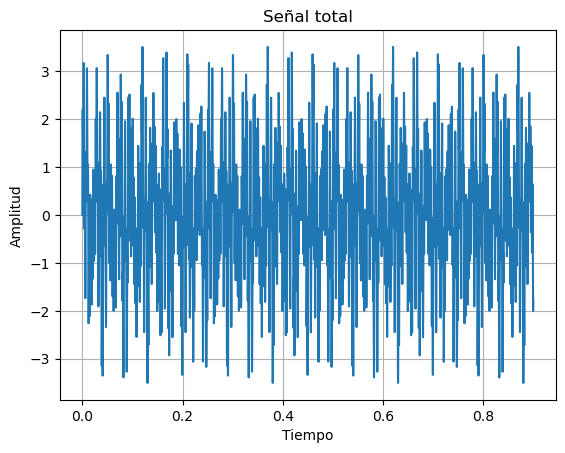

In [56]:
fs= 4000
t = np.arange(0, 0.9, 1/fs) #tiempo para las 4 señales
XT=x1+x2+x3+x4
plt.plot(t, XT)
#plt.xlim(0,0.05)
plt.title('Señal total')
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.grid()

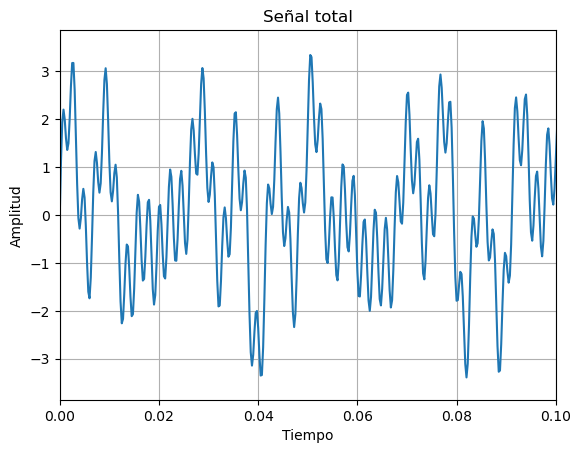

In [57]:
plt.plot(t, XT)
plt.xlim(0,0.1)
plt.title('Señal total')
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.grid()

#### Al realizar un zoom en la señal total se puede apreciar que ninguna de las señales es reconocible

#### 2.6) grafica de la transformada en sus componentes real e imaginaria

(-600.0, 600.0)

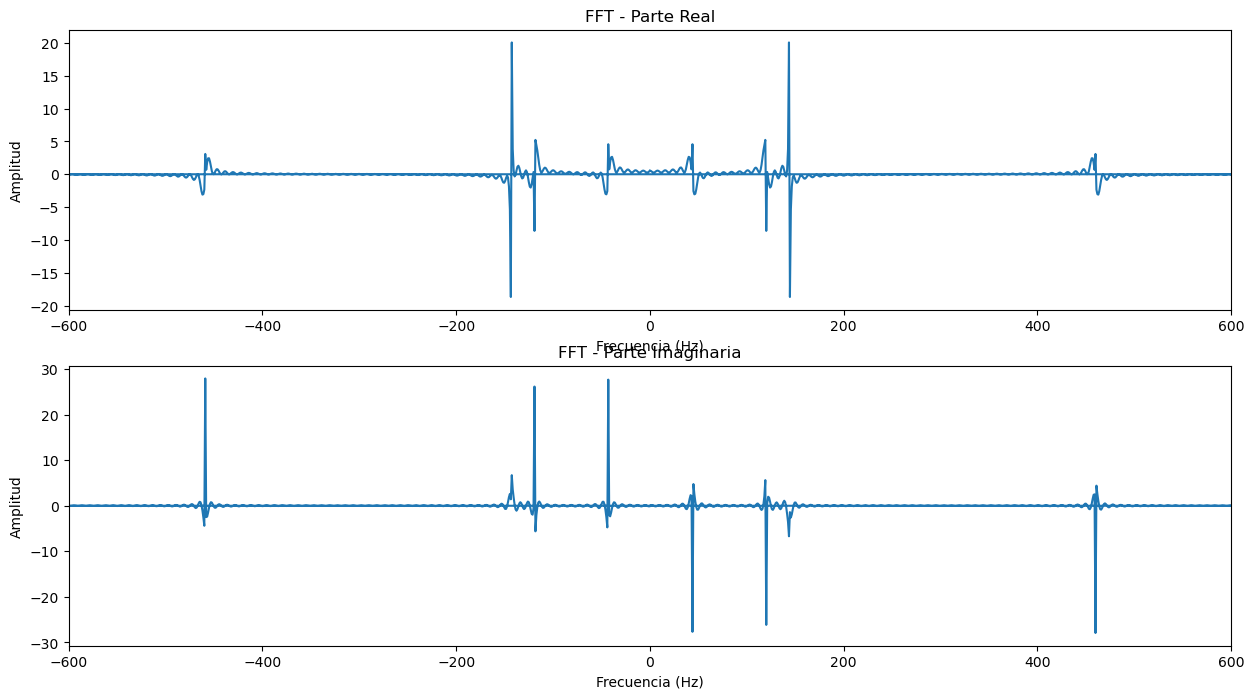

In [58]:
#nfft de 4096 puntos
nfft=4096
XT.shape=(len(XT),1) # Convierto en vector columna para poder multiplicar con la matriz


U1=dftmatrix(len(XT), nfft) #matriz de transformacion

X=U1.H*XT[:] # calculo la fft

freq=np.hstack((np.arange(0, nfft/2-1), np.arange(-nfft/2, 1)))*fs/nfft # vector de frecuencias
plt.figure(figsize=(15,8))
# Graficar la parte real
plt.subplot(2, 1, 1)
plt.plot(freq, np.real(X))
plt.title('FFT - Parte Real')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Amplitud')
plt.xlim(-600,600)


# Graficar la parte imaginaria
plt.subplot(2, 1, 2)
plt.plot(freq, np.imag(X))
plt.title('FFT - Parte Imaginaria')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Amplitud')
plt.xlim(-600,600)



#### * En la parte real muestra como se distribuyen las frecuencias sumadas y su respectivas amplitudes 
#### * La parte real posee un comportamiento de simetria par respector al eje vertical
#### * En la grafica de la parte imaginaria muestra como las diferentes frecuencias contribuyen con la fase de la señal 
#### * Esta grafica muestra comportamiento de simetria impar
.

#### 2.7) 2 Señales con Offset

In [59]:
x1=np.sin(2*np.pi*f1*t - np.pi)
x3=np.sin(2*np.pi*f3*t - np.pi)

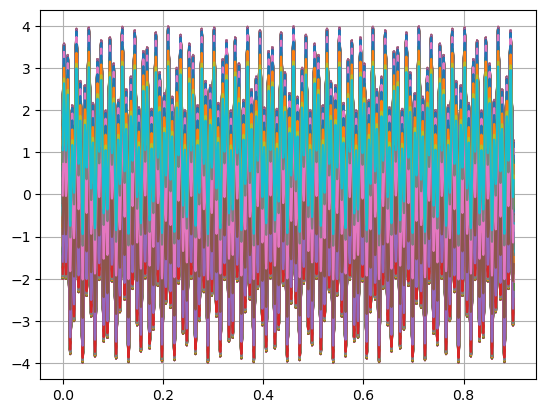

In [60]:
XT1=x1+x2+x3+x4
plt.plot(t, XT1)
#plt.xlim(0,0.1)
plt.grid()
plt.show()


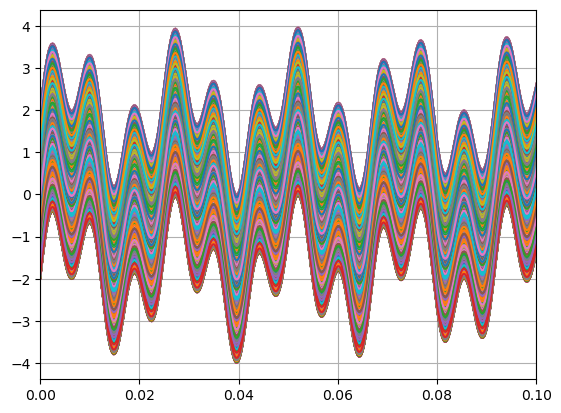

In [61]:
plt.plot(t, XT1)
plt.xlim(0,0.1)
plt.grid()
plt.show()

#### como se puede observar al agregar un offset de menos pi a las señales, la señal resultante tambien sufrio un desplazamiento de manera uniforme hacia abajo

#### 3.)Recuperacion de la señal a partir de la Transformada de Fourier

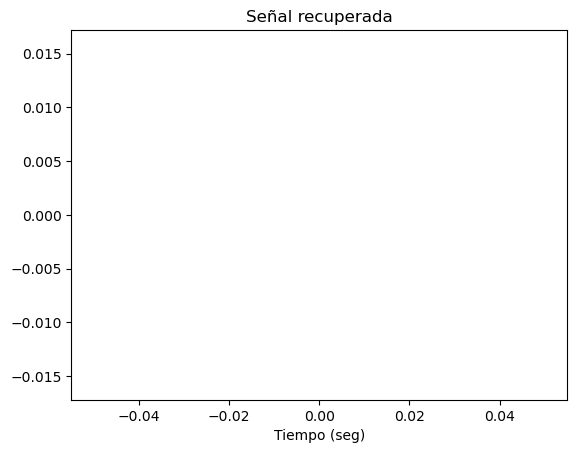

In [69]:
inversa1=np.fft.ifft(Xf1.T)
t_recuperado1 = np.arange(0, len(inversa1)/fs, 1/fs)
plt.plot(t_recuperado1, inversa1, 'r')
plt.title('Señal recuperada')
plt.xlabel('Tiempo (seg)')
plt.grid()

inversa2=np.fft.ifft(Xf2.T)
t_recuperado2 = np.arange(0, len(inversa2)/fs, 1/fs)
plt.plot(t_recuperado2, inversa2, 'r')
plt.title('Señal recuperada')
plt.xlabel('Tiempo (seg)')
plt.grid()

inversa3=np.fft.ifft(Xf3.T)
t_recuperado3 = np.arange(0, len(inversa2)/fs, 1/fs)
plt.plot(t_recuperado3, inversa3, 'r')
plt.title('Señal recuperada')
plt.xlabel('Tiempo (seg)')
plt.grid()

inversa4=np.fft.ifft(Xf4.T)
t_recuperado4 = np.arange(0, len(inversa4)/fs, 1/fs)
plt.plot(t_recuperado4, inversa4, 'r')
plt.title('Señal recuperada')
plt.xlabel('Tiempo (seg)')
plt.grid()


## Conclusiones

####  * La transformada rapida de fourier es fundamental para el analisis de señales digitales como lo es su comportamiento, simetria, valores en la parte real o imaginaria, magnitud, etc.

#### * NFFT permite permite un ajuste fino de la resolución en frecuencia y la capacidad de interpolar la señal en el dominio de la frecuencia

#### * al aumentar el offset de una señal esta se vera reflejada en la suma total de las señales implicadas

